In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"C:\Users\dhruv\Internship\Task_6\dataset\1\retail_dataset\retail_store_inventory.csv"
data = pd.read_csv(file_path)
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [3]:
data.describe

<bound method NDFrame.describe of              Date Store ID Product ID     Category Region  Inventory Level  \
0      2022-01-01     S001      P0001    Groceries  North              231   
1      2022-01-01     S001      P0002         Toys  South              204   
2      2022-01-01     S001      P0003         Toys   West              102   
3      2022-01-01     S001      P0004         Toys  North              469   
4      2022-01-01     S001      P0005  Electronics   East              166   
...           ...      ...        ...          ...    ...              ...   
73095  2024-01-01     S005      P0016    Furniture   East               96   
73096  2024-01-01     S005      P0017         Toys  North              313   
73097  2024-01-01     S005      P0018     Clothing   West              278   
73098  2024-01-01     S005      P0019         Toys   East              374   
73099  2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Orde

In [4]:
data.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [5]:
data['Date'] = pd.to_datetime(data['Date'])


In [6]:
data.rename(columns={'Units Sold':'Sales'}, inplace = True)
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Sales,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [7]:
selected_columns = ['Date', 'Category', 'Region', 'Sales', 'Price', 'Demand Forecast', 'Seasonality']
new_data = data[selected_columns]
new_data.head()

,Date,Category,Region,Sales,Price,Demand Forecast,Seasonality
0,2022-01-01,Groceries,North,127,33.50,135.47,Autumn
1,2022-01-01,Toys,South,150,63.01,144.04,Autumn
2,2022-01-01,Toys,West,65,27.99,74.02,Summer
3,2022-01-01,Toys,North,61,32.72,62.18,Autumn
4,2022-01-01,Electronics,East,14,73.64,9.26,Summer


In [8]:
print(new_data['Category'].value_counts())

Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Electronics    14521
Name: count, dtype: int64


In [9]:
new_data['Demand Forecast'].describe()

count    73100.000000
mean       141.494720
std        109.254076
min         -9.990000
25%         53.670000
50%        113.015000
75%        208.052500
max        518.550000
Name: Demand Forecast, dtype: float64

In [10]:
furniture_data = new_data[new_data['Category'] == 'Furniture']
print(furniture_data[['Sales', 'Region']].head(10))

    Sales Region
6      97   East
10    150  South
22    182   East
25    250  North
52     17  North
67     51  South
68     40  North
72     56   East
83    300   West
92    238  South


In [11]:
region_sales = furniture_data.groupby('Region')['Sales'].count().reset_index()
region_sales

,Region,Sales
0,East,3607
1,North,3720
2,South,3684
3,West,3688


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\716598995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'Sales', data = region_sales, palette='coolwarm')


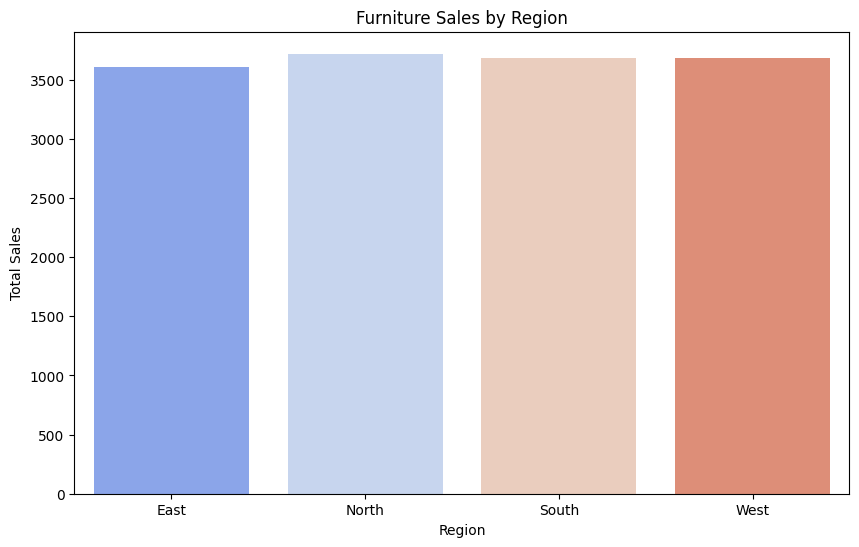

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Region', y = 'Sales', data = region_sales, palette='coolwarm')
plt.title("Furniture Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()


In [13]:
def demand_forecast(x):
    if x >= 60:
        return "Low Demand"
    elif 60 <= x <= 250:
        return "Medium Demand"
    else:
        return "High Demand"
new_data['Demand Forecast Categorized'] = new_data['Demand Forecast'].apply(demand_forecast)
new_data.head()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\2413639225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Demand Forecast Categorized'] = new_data['Demand Forecast'].apply(demand_forecast)


,Date,Category,Region,Sales,Price,Demand Forecast,Seasonality,Demand Forecast Categorized
0,2022-01-01,Groceries,North,127,33.50,135.47,Autumn,Low Demand
1,2022-01-01,Toys,South,150,63.01,144.04,Autumn,Low Demand
2,2022-01-01,Toys,West,65,27.99,74.02,Summer,Low Demand
3,2022-01-01,Toys,North,61,32.72,62.18,Autumn,Low Demand
4,2022-01-01,Electronics,East,14,73.64,9.26,Summer,High Demand


In [14]:
toys_data = new_data[new_data['Category'] == 'Toys']
print(toys_data[['Sales', 'Region']].head(10))

    Sales Region
1     150  South
2      65   West
3      61  North
9      28  South
12     42  South
16    246   West
19     99   East
23     63   West
24    156   West
34    129  South


In [15]:
region_sales_toys = toys_data.groupby('Region')['Sales'].count().reset_index()
region_sales_toys

,Region,Sales
0,East,3600
1,North,3739
2,South,3652
3,West,3652


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\2235092612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'Sales', data = region_sales_toys, palette='coolwarm')


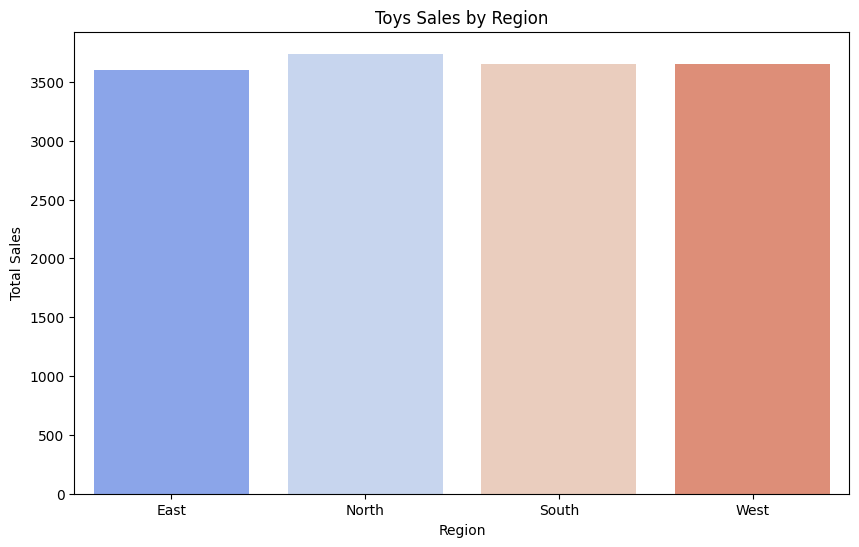

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Region', y = 'Sales', data = region_sales_toys, palette='coolwarm')
plt.title("Toys Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()

In [17]:
clothing_data = new_data[new_data['Category'] == 'Clothing']
print(clothing_data[['Sales', 'Region']].head(10))

    Sales Region
7     312  North
11     24   West
13     12   West
14    369  North
17    151  South
18    257   East
21    141   West
28      9  South
32    283   East
44    325   West


In [18]:
region_sales_clothing = clothing_data.groupby('Region')['Sales'].count().reset_index()
region_sales_clothing

,Region,Sales
0,East,3753
1,North,3528
2,South,3651
3,West,3694


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\518349103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'Sales', data = region_sales_clothing, palette='coolwarm')


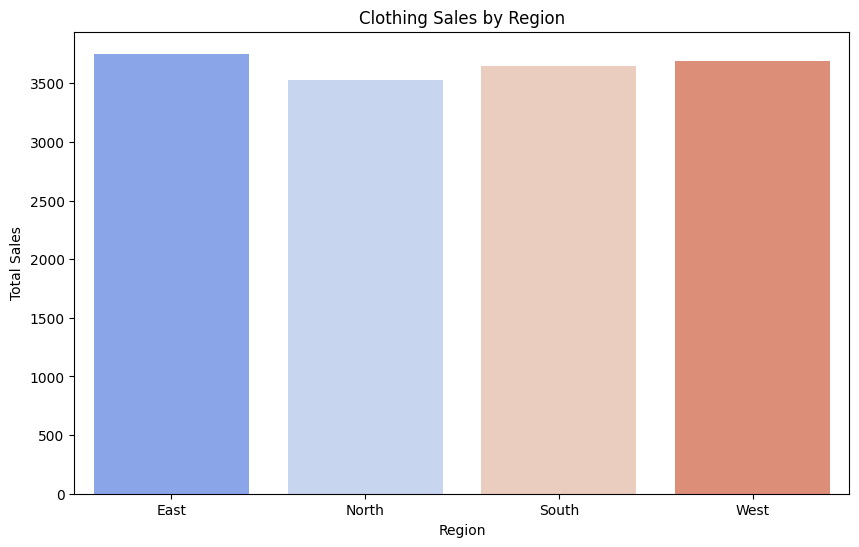

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Region', y = 'Sales', data = region_sales_clothing, palette='coolwarm')
plt.title("Clothing Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()

In [20]:
groceries_data = new_data[new_data['Category'] == 'Groceries']
print(groceries_data[['Sales', 'Region']].head(10))

    Sales Region
0     127  North
5     128  South
20    104  South
26    393   West
30     13   West
31     25   East
36    373   West
37    160  North
42     77  South
45    163  North


In [21]:
region_sales_groceries = groceries_data.groupby('Region')['Sales'].count().reset_index()
region_sales_groceries

,Region,Sales
0,East,3684
1,North,3652
2,South,3704
3,West,3571


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\2589445051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'Sales', data = region_sales_groceries, palette='coolwarm')


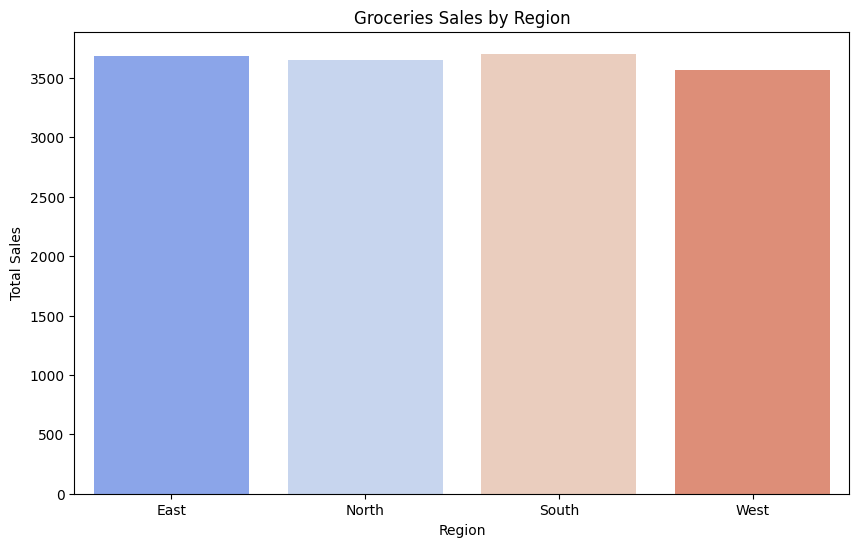

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Region', y = 'Sales', data = region_sales_groceries, palette='coolwarm')
plt.title("Groceries Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()


In [23]:
electronics_data = new_data[new_data['Category'] == 'Electronics']
print(electronics_data[['Sales', 'Region']].head(10))

    Sales Region
4      14   East
8     175   West
15    255  North
27     29   West
29    126  North
33    359   East
41      4   West
46     34  North
51    175  North
53    369  South


In [24]:
region_sales_electronics = electronics_data.groupby('Region')['Sales'].count().reset_index()
region_sales_electronics

,Region,Sales
0,East,3705
1,North,3589
2,South,3606
3,West,3621


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\2148257153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'Sales', data = region_sales_electronics, palette='coolwarm')


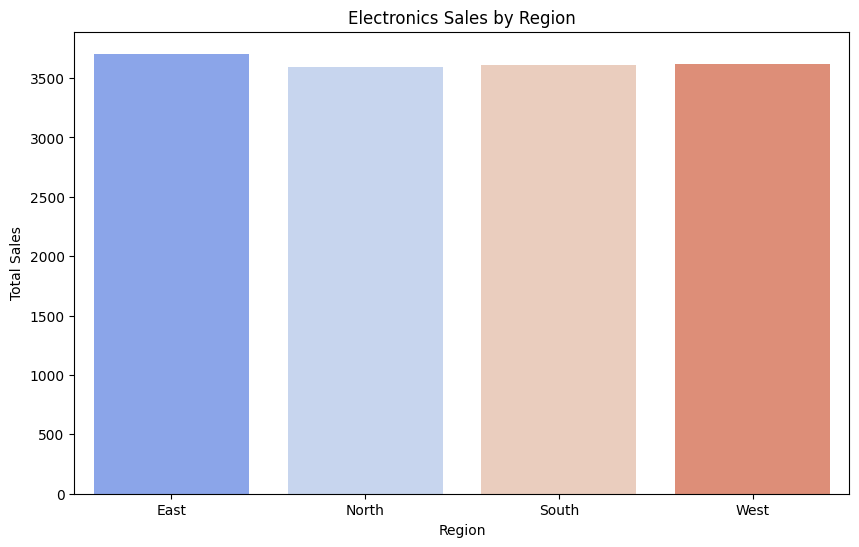

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Region', y = 'Sales', data = region_sales_electronics, palette='coolwarm')
plt.title("Electronics Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()

In [26]:
furniture_seasonality = new_data[new_data['Category'] == 'Furniture']
print(furniture_seasonality[['Sales', 'Seasonality']].head(10))

    Sales Seasonality
6      97      Winter
10    150      Spring
22    182      Spring
25    250      Winter
52     17      Summer
67     51      Winter
68     40      Summer
72     56      Autumn
83    300      Spring
92    238      Summer


In [27]:
furniture_sales = furniture_seasonality.groupby('Seasonality')['Sales'].count().reset_index()
furniture_sales

,Seasonality,Sales
0,Autumn,3585
1,Spring,3755
2,Summer,3661
3,Winter,3698


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\1530760706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Seasonality', y = 'Sales', data = furniture_sales, palette= 'dark')


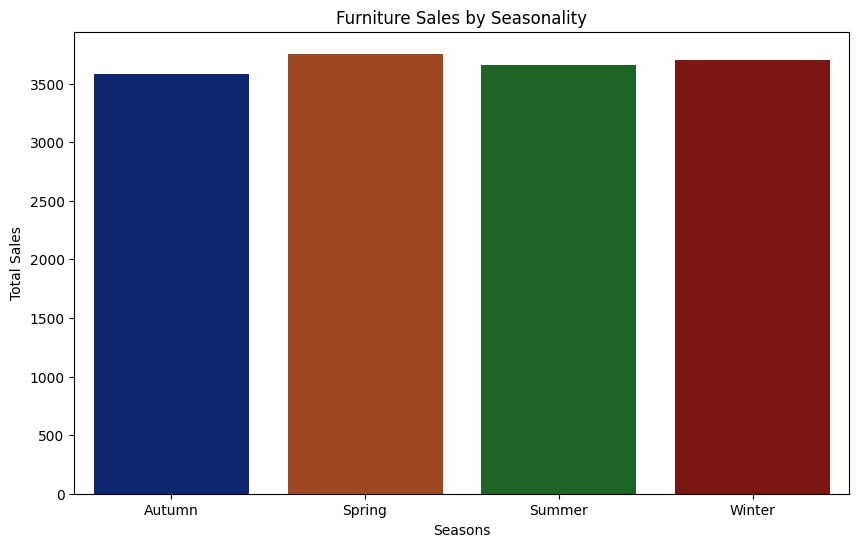

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Seasonality', y = 'Sales', data = furniture_sales, palette= 'dark')
plt.title("Furniture Sales by Seasonality")
plt.xlabel("Seasons")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()

In [29]:
toys_seasonality = new_data[new_data['Category'] == 'Toys']
print(toys_seasonality[['Sales', 'Seasonality']].head(10))

    Sales Seasonality
1     150      Autumn
2      65      Summer
3      61      Autumn
9      28      Winter
12     42      Spring
16    246      Winter
19     99      Spring
23     63      Autumn
24    156      Autumn
34    129      Winter


In [30]:
toys_sales = toys_seasonality.groupby('Seasonality')['Sales'].count().reset_index()
toys_sales

,Seasonality,Sales
0,Autumn,3657
1,Spring,3663
2,Summer,3651
3,Winter,3672


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\140064965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Seasonality', y = 'Sales', data = toys_sales, palette='dark')


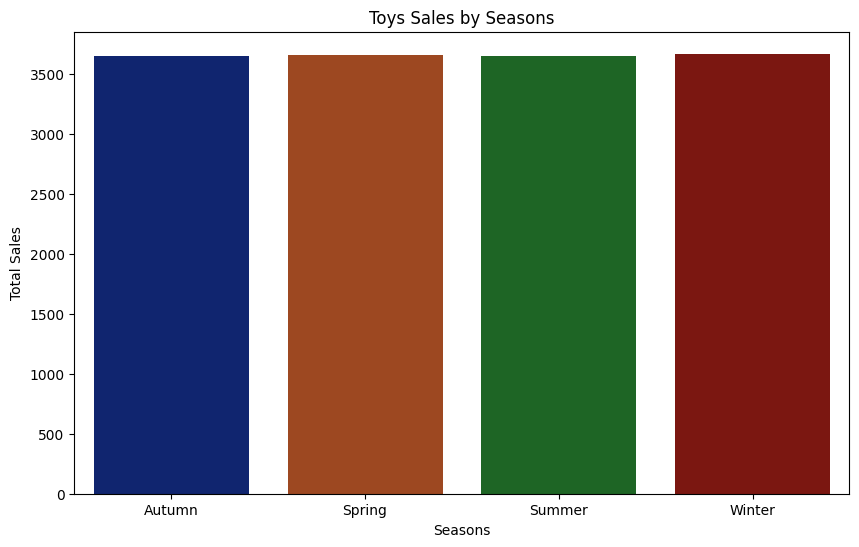

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Seasonality', y = 'Sales', data = toys_sales, palette='dark')
plt.title("Toys Sales by Seasons")
plt.xlabel("Seasons")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()

In [32]:
clothing_seasonality = new_data[new_data['Category'] == 'Clothing']
print(clothing_seasonality[['Sales', 'Seasonality']].head(10))

    Sales Seasonality
7     312      Spring
11     24      Spring
13     12      Spring
14    369      Winter
17    151      Autumn
18    257      Winter
21    141      Winter
28      9      Winter
32    283      Spring
44    325      Winter


In [33]:
clothing_sales = clothing_seasonality.groupby('Seasonality')['Sales'].count().reset_index()
clothing_sales

,Seasonality,Sales
0,Autumn,3636
1,Spring,3675
2,Summer,3626
3,Winter,3689


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\3109631936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Seasonality', y = 'Sales', data = clothing_sales, palette='dark')


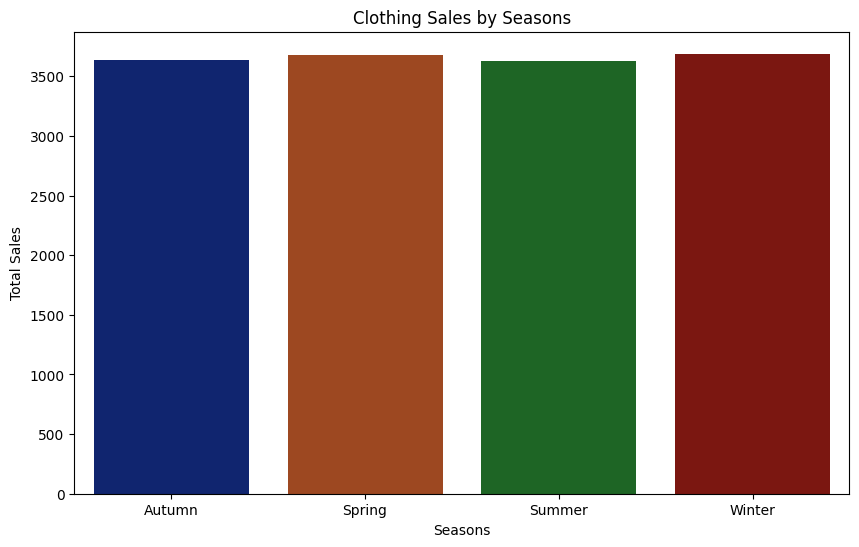

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Seasonality', y = 'Sales', data = clothing_sales, palette='dark')
plt.title("Clothing Sales by Seasons")
plt.xlabel("Seasons")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()

In [35]:
groceries_seasonality = new_data[new_data['Category'] == 'Groceries']
print(groceries_seasonality[['Sales', 'Seasonality']].head(10))

    Sales Seasonality
0     127      Autumn
5     128      Winter
20    104      Spring
26    393      Summer
30     13      Autumn
31     25      Winter
36    373      Winter
37    160      Summer
42     77      Spring
45    163      Summer


In [36]:
groceries_sales = groceries_seasonality.groupby('Seasonality')['Sales'].count().reset_index()
groceries_sales

,Seasonality,Sales
0,Autumn,3723
1,Spring,3560
2,Summer,3705
3,Winter,3623


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\2333230488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Seasonality', y = 'Sales', data = groceries_sales, palette='dark')


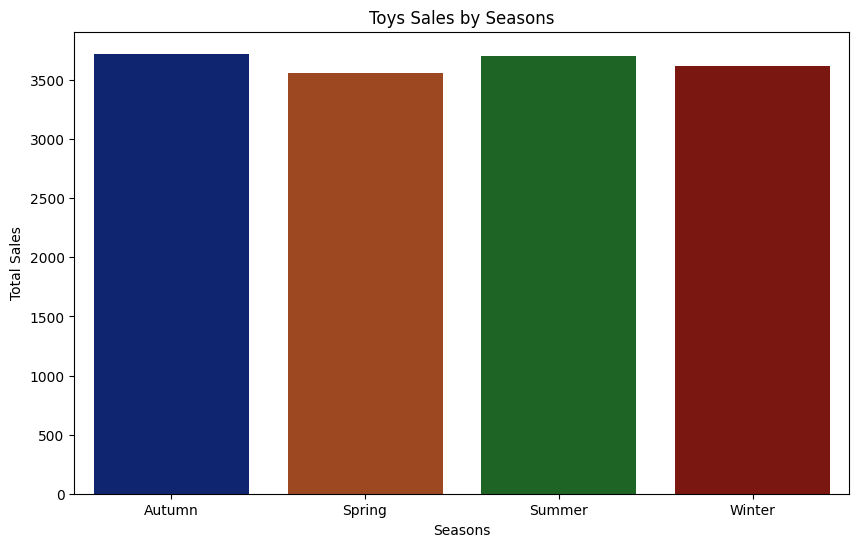

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Seasonality', y = 'Sales', data = groceries_sales, palette='dark')
plt.title("Toys Sales by Seasons")
plt.xlabel("Seasons")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()

In [38]:
electronics_seasonality = new_data[new_data['Category'] == 'Electronics']
print(electronics_seasonality[['Sales', 'Seasonality']].head(10))

    Sales Seasonality
4      14      Summer
8     175      Autumn
15    255      Autumn
27     29      Summer
29    126      Winter
33    359      Summer
41      4      Spring
46     34      Summer
51    175      Summer
53    369      Spring


In [39]:
electronics_sales = electronics_seasonality.groupby('Seasonality')['Sales'].count().reset_index()
electronics_sales

,Seasonality,Sales
0,Autumn,3592
1,Spring,3664
2,Summer,3662
3,Winter,3603


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\1597131611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Seasonality', y = 'Sales', data = electronics_sales, palette='dark')


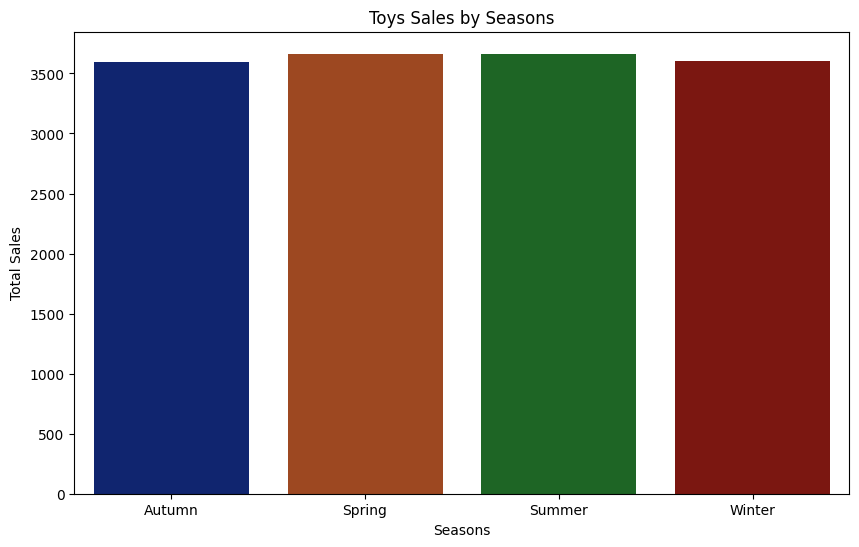

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Seasonality', y = 'Sales', data = electronics_sales, palette='dark')
plt.title("Toys Sales by Seasons")
plt.xlabel("Seasons")
plt.ylabel("Total Sales")
plt.tight_layout
plt.show()

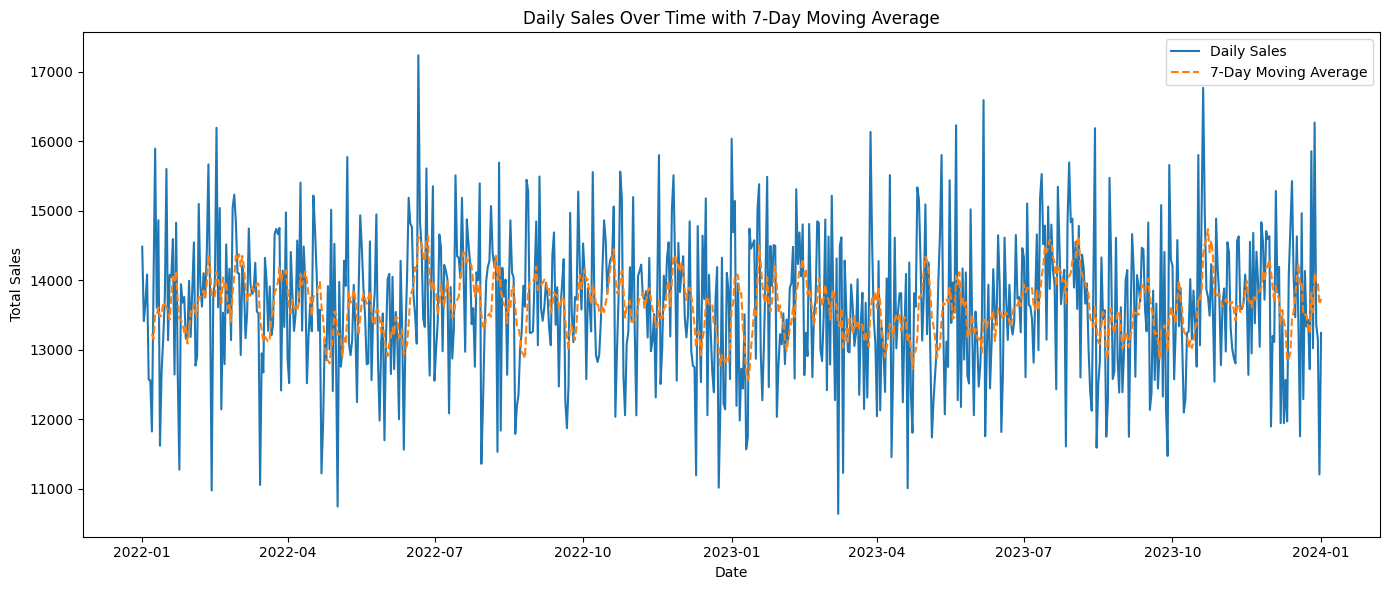

In [41]:
plt.figure(figsize=(14, 6))

# Plot overall sales over time using line chart
data_grouped = new_data.groupby('Date')['Sales'].sum().reset_index()

# Plot the line chart
sns.lineplot(data=data_grouped, x='Date', y='Sales', label='Daily Sales')

# Calculate and plot 7-day moving average
data_grouped['7-Day MA'] = data_grouped['Sales'].rolling(window=7).mean()
sns.lineplot(data=data_grouped, x='Date', y='7-Day MA', label='7-Day Moving Average', linestyle='--')

plt.title('Daily Sales Over Time with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
# pip install statsmodels

In [43]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [44]:
new_data.set_index('Date', inplace = True)
sales_series = new_data['Sales'].resample('D').sum()
sales_series = sales_series.fillna(0)

result = adfuller(sales_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    sales_series_diff = sales_series.diff().dropna
else:
    sales_series_diff = sales_series

ADF Statistic: -26.379506701264113
p-value: 0.0


In [45]:
train_size = int(len(sales_series) * 0.8)
train, test = sales_series[:train_size], sales_series[train_size:]

model = SARIMAX(train, order = (1, 1, 1), seasonal_order = (0, 0, 0, 0))
results = model.fit(disp = False)

In [46]:
forecast = results.forecast(steps = len(test))

In [47]:
rsme = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100

print(f"RSME: {rsme:.2f}")
print(f"MAPE: {mape:.2f}%")

RSME: 1050.34
MAPE: 6.26%


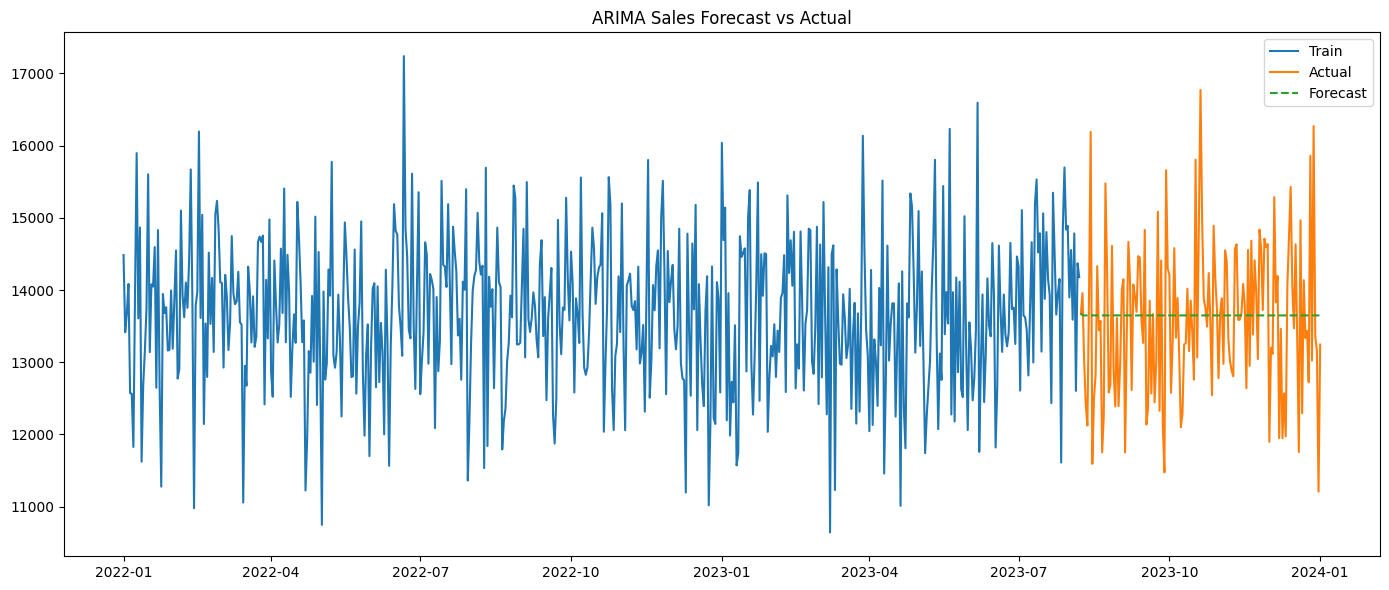

In [48]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Sales Forecast vs Actual')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
future_steps = 30
future_forecast = results.get_forecast(steps = future_steps)

forecast_df = future_forecast.summary_frame()
forecast_df = forecast_df[['mean']]
forecast_df.rename(columns = {'mean': 'Forecasted Sales'}, inplace = True)
forecast_df.index.name = 'Date'

print(forecast_df.head(10))

Sales       Forecasted Sales
Date                        
2023-08-08      13678.998744
2023-08-09      13650.104352
2023-08-10      13648.431238
2023-08-11      13648.334357
2023-08-12      13648.328748
2023-08-13      13648.328423
2023-08-14      13648.328404
2023-08-15      13648.328403
2023-08-16      13648.328403
2023-08-17      13648.328403


Heart Disease 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
heart_disease_file_path = r"C:\Users\dhruv\Internship\Task_6\heart_disease_dataset_2.csv"
hd_data = pd.read_csv(heart_disease_file_path)
hd_data

,Age,Gender,Cholesterol,Blood Pressure,Heart Disease
0,68,Male,206,130/96,0
1,58,Male,195,129/76,0
2,44,Male,175,108/76,0
3,72,Female,225,108/83,0
4,37,Male,219,90/78,0
...,...,...,...,...,...
995,55,Male,222,108/108,0
996,63,Female,151,133/73,0
997,74,Female,173,133/91,0
998,35,Female,198,127/87,0


In [52]:
hd_data.describe()

,Age,Cholesterol,Heart Disease
count,1000.000000,1000.000000,1000.000000
mean,54.830000,200.632000,0.350000
std,14.346809,29.637222,0.477208
min,30.000000,130.000000,0.000000
25%,43.000000,181.000000,0.000000
50%,55.000000,201.000000,0.000000
75%,66.000000,221.000000,1.000000
max,79.000000,293.000000,1.000000


In [53]:
hd_data.isnull().sum()

Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64

In [54]:
print(hd_data['Heart Disease'].unique())

[0 1]


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
hd_data['Gender'] = hd_data['Gender'].replace({'Male' : 0, 'Female' : 1})
hd_data

C:\Users\dhruv\AppData\Local\Temp\ipykernel_15824\1140694649.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hd_data['Gender'] = hd_data['Gender'].replace({'Male' : 0, 'Female' : 1})


,Age,Gender,Cholesterol,Blood Pressure,Heart Disease
0,68,0,206,130/96,0
1,58,0,195,129/76,0
2,44,0,175,108/76,0
3,72,1,225,108/83,0
4,37,0,219,90/78,0
...,...,...,...,...,...
995,55,0,222,108/108,0
996,63,1,151,133/73,0
997,74,1,173,133/91,0
998,35,1,198,127/87,0


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

hd_data[['Systolic', 'Diastolic']] = hd_data['Blood Pressure'].str.split('/', expand=True).astype(float)

features = ['Age', 'Cholesterol', 'Systolic', 'Diastolic', 'Gender']
target = 'Heart Disease'

scaler = MinMaxScaler()
X = scaler.fit_transform(hd_data[features])
y = hd_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.825
Confusion Matrix:
 [[112  13]
 [ 22  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.86       125
           1       0.80      0.71      0.75        75

    accuracy                           0.82       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.82      0.82      0.82       200

